<a href="https://colab.research.google.com/github/pauloabq/quarentena-dados/blob/master/Quarentena_dados_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 - Correlações e Exploração de Dados


Importando uma nova base de dados, agora do IMDB. 
Vamos explorar esta base desconhecida para tirar conclusões.

Foi hospedada no github ([aqui](https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv), tendo como origem no [Kaggle](https://www.kaggle.com/) - plataforma de conjunto de dados 

**Kaggle** é a maior plataforma de hospedagem para projetos e competições de Data Science que existe atualmente. Kaggle disponibiliza datasets, kernels, plataforma de aprendizado e fórum para perguntas.



In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
imdb.head()
sns.set_style("whitegrid")


Encontrar valores únicos para esta coluna (ou série)

In [110]:
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [111]:
len(imdb)

5043

Vamos verificar quantos filmes temos por cada tipo de cor (contar os valores únicos de uma coluna)

In [112]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [113]:
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

**95%** dos filmes são coloridos

Na coluna de Diretor, podemos verificar quantos filmes temos por cada diretor.

É importante conhecer a base de dados. Temos os nomes dos diretores. Como exemplo, quado temos 'irmãos X' como diretores, como os dados aparecem? Precisa sempre analisar.

In [114]:
imdb["director_name"].value_counts()

Steven Spielberg      26
Woody Allen           22
Martin Scorsese       20
Clint Eastwood        20
Ridley Scott          17
                      ..
Raja Menon             1
Tay Garnett            1
Jonathan Hensleigh     1
Vicky Jewson           1
Daniel Hsia            1
Name: director_name, Length: 2398, dtype: int64

Agora explorando alguma coluna que contenha número. As anteriores continham texto

In [115]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [116]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

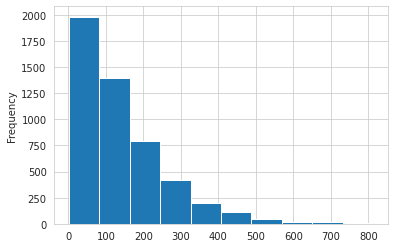

In [117]:
imdb["num_critic_for_reviews"].plot(kind="hist")

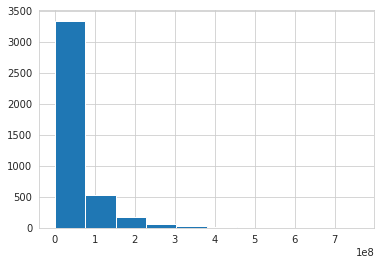

In [118]:
imdb["gross"].hist()

In [119]:
imdb.sort_values("gross", ascending=False)[["movie_title", "gross"]]

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
794,The Avengers,623279547.0
17,The Avengers,623279547.0
...,...,...
5032,Bang,NaN
5036,The Mongol King,NaN
5038,Signed Sealed Delivered,NaN
5039,The Following,NaN


Criar uma nova informação, onde armazena 1 para filme colorido e 0 para preto e branco.

In [120]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
# multiplica por 1, pois se for True vai ser 1; se for False, 0
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [121]:
color_or_bw.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Agora, gerando um novo tipo de gráfico de dispersão **scatterplot**, onde X é a coluna nova (0 ou 1) e y é o faturamento




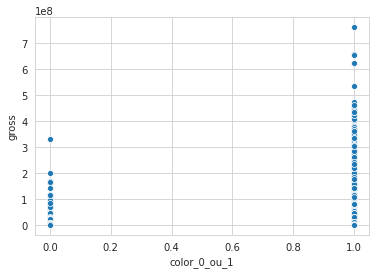

In [122]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

Explorando mais estatísticas dos filmes


In [123]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [124]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [125]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Fazendo um gráfico que verifica o Orçamento vs Faturamento, temos uma informação importante: filmes em lingua estrangeira provavelmente tem um valor de orçamento alto por conta da moeda (ex: Sul Coreanos). Com isso, ao comparar com os filmes que tem orçamento em Dólar amercano, cria uma informação errada. Vejamos

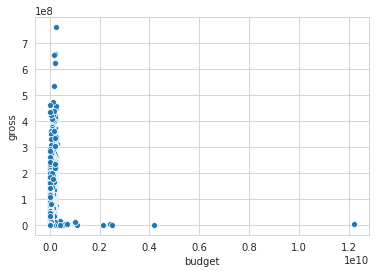

In [126]:
# obtendo um novo dataframe, removendo as linhas NaN tanto de budget quanto de gross, e que ambos sejam maior que 0
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

# plotando um gráfico que mostra a discrepância, provavelmente devido a moedas diferentes
sns.scatterplot(x="budget", y="gross", data = budget_gross)

In [127]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Com isso, vamos separar a base apenas com filmes USA

In [128]:
imdb["country"].value_counts()
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [152]:
imdb_usa = imdb.query("country=='USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


In [130]:
imdb_usa = imdb_usa.drop_duplicates()
len(imdb_usa)

3773

Agora, apenas com os filmes USA, vamos verificar novamente o gráfico de Orçamento vs Faturamento

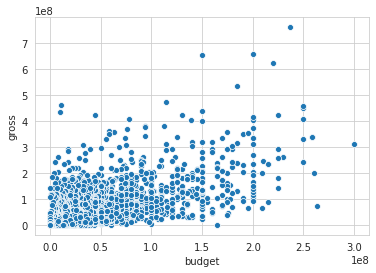

In [131]:
budget_gross=  imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)

Analisando Lucro e Prejuízo



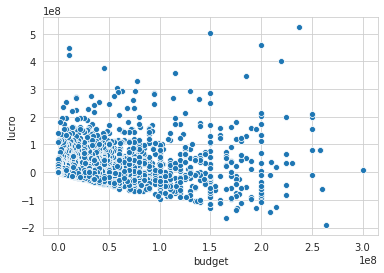

In [132]:
# obtendo nova série, sendo faturamento - orçamento
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

# novo dataframe, onde pegamos apenas os registros que possuem orçamento e faturamento, e removendo linhas que não contenham valores
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.scatterplot(x="budget", y="lucro", data = budget_gross)

Verificando o ranking de pior lucro:

In [133]:
imdb_usa.sort_values("lucro", ascending=True).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
91,Color,Robert Zemeckis,188.0,100.0,0.0,267.0,Eddie Deezen,15000.0,665426.0,Adventure|Animation|Family|Fantasy,Tom Hanks,The Polar Express,120798,16264,Peter Scolari,0.0,boy|christmas|christmas eve|north pole|train,http://www.imdb.com/title/tt0338348/?ref_=fn_t...,444.0,English,USA,G,165000000.0,2004.0,726.0,6.6,2.35,10000,-164334574.0
28,Color,Peter Berg,377.0,131.0,532.0,627.0,Alexander Skarsgård,14000.0,65173160.0,Action|Adventure|Sci-Fi|Thriller,Liam Neeson,Battleship,202382,26679,Tadanobu Asano,0.0,box office flop|hawaii|naval|oahu hawaii|ship,http://www.imdb.com/title/tt1440129/?ref_=fn_t...,751.0,English,USA,PG-13,209000000.0,2012.0,10000.0,5.9,2.35,44000,-143826840.0
85,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,38297305.0,Action|Adventure|Drama|Fantasy,Keanu Reeves,47 Ronin,116994,20965,Jin Akanishi,2.0,box office flop|ronin|samurai|shogun|tournament,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,324.0,English,USA,PG-13,175000000.0,2013.0,1000.0,6.3,2.35,35000,-136702695.0
49,Color,Bryan Singer,338.0,114.0,0.0,140.0,Ewen Bremner,979.0,65171860.0,Adventure|Fantasy,Eddie Marsan,Jack the Giant Slayer,106416,1766,Ralph Brown,1.0,bean|giant|king|no opening credits|princess,http://www.imdb.com/title/tt1351685/?ref_=fn_t...,205.0,English,USA,PG-13,195000000.0,2013.0,557.0,6.3,2.35,22000,-129828140.0


De acordo com o ano, como fica a distribuição:


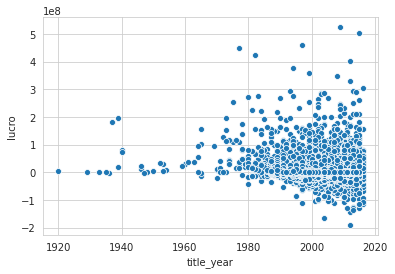

In [134]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Análise com os nome dos diretores e o orçamento de seus filmes.
Vamos criar uma nova coluna contendo a quantidade de filmes que aquele diretor possui, e plotar esta informação no gráfico.
Estratégia:
- Criar uma série com a quantidade de filmes por diretor;
- Fazer um join com o dataframe de filmes USA (imdb_usa)
  + Neste join temos **"director_name"** na série e no dataframe, e vai gerar erro. A solução foi setar o **"director_name"** do dataframe `imdb_usa[["director_name", "gross"]]` como índice.


In [0]:
# separando uma série com o Nome do diretr e Qtd de filmes
filmes_por_diretor = imdb_usa["director_name"].value_counts()

# criando um novo dataframe, setando a coluna director_name como indice, e fazendo o join com a série filmes_por_diretor
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")

# alterando o nome das colunas, pois temos a 'duplicidade' de director_name
gross_director.columns = ["dindin", "filmes_irmaos"]

# resetando o índice. agora, director_name passa a ser uma série dentro do dataframe, e nele será criado um índice numerado
gross_director = gross_director.reset_index()


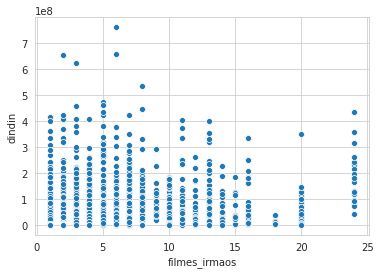

In [136]:
# por último, vamos 'plotar' no gráfico de dispersão (scatterplot)
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Análise das correlações plotando um gráfico com pairplot.




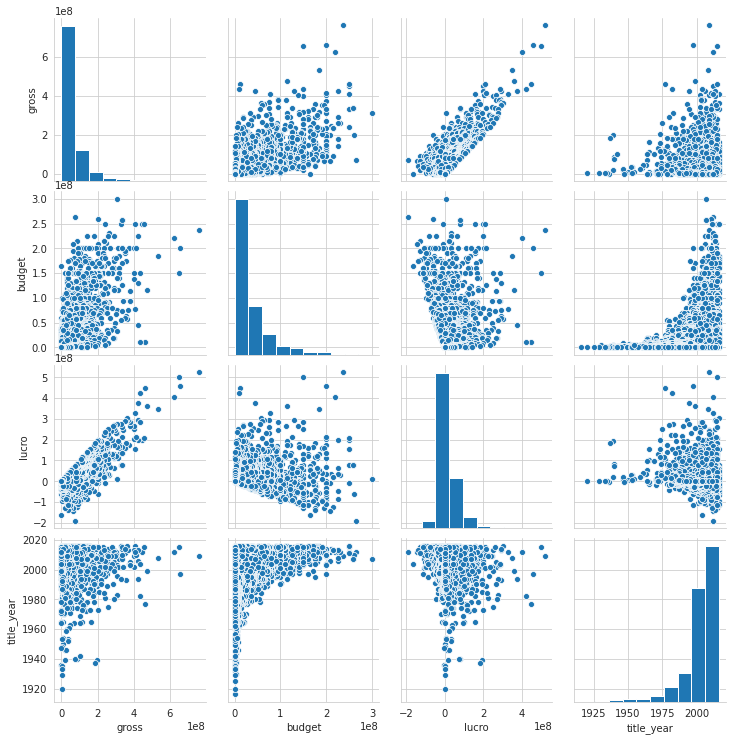

In [137]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do .corr() do pandas.

In [138]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


# Desafios aula 3



## Desafio 1 do Thiago Gonçalves
Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.



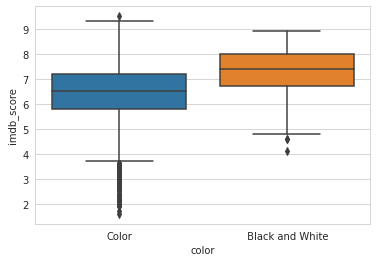

In [139]:
sns.boxplot(x='color', y='imdb_score', data=color_or_bw)
plt.show()

## Desafio 2 do Guilherme Silveira
No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).



In [140]:
imdb_usa.sort_values('lucro').head(1)[['movie_title', 'lucro']]

,movie_title,lucro
5,John Carter,-190641321.0


## Desafio 3 do Guilherme Silveira
Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.



In [141]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(20)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
163,Gods of Egypt,-108858926.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0
2404,My Big Fat Greek Wedding 2,41573085.0,2016.0
244,The Huntsman: Winter's War,-67047980.0,2016.0
1742,The Boss,34034755.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
150,Ghostbusters,-25900341.0,2016.0
154,Kung Fu Panda 3,-1476537.0,2016.0
65,X-Men: Apocalypse,-23014913.0,2016.0
567,The Angry Birds Movie,34225164.0,2016.0


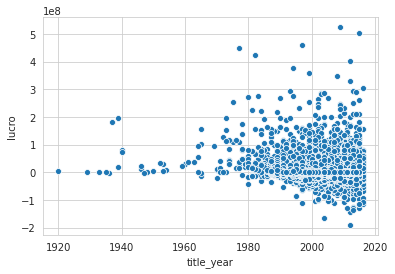

In [142]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data=lucro_year)

## Desafio 4 do Paulo Silveira
Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.



### Minha solução

In [143]:
imdb_usa[['title_year','lucro','movie_title']].query('title_year < 1940').sort_values("lucro", ascending=False).head(5)

,title_year,lucro,movie_title
3970,1939.0,194678278.0,Gone with the Wind
4449,1937.0,182925485.0,Snow White and the Seven Dwarfs
4157,1939.0,19402612.0,The Wizard of Oz
4958,1920.0,2900000.0,Over the Hill to the Poorhouse
4812,1929.0,2429000.0,The Broadway Melody


### Solução instrutor

In [144]:
pre_war = imdb_usa.query('title_year < 1940').sort_values('lucro', ascending=False).dropna()
pre_war[['movie_title', 'lucro']].head(2)

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0


## Desafio 5 do Paulo Silveira
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)



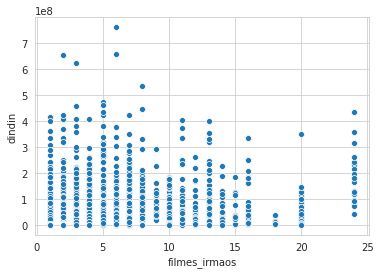

In [145]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)
plt.show()

In [146]:
gross_director
gross_director.query("filmes_irmaos > 15 & filmes_irmaos < 20").groupby(["director_name", "filmes_irmaos"])["dindin"].max()



director_name  filmes_irmaos
Spike Lee      16.0              88504640.0
Tim Burton     16.0             334185206.0
Woody Allen    18.0              39200000.0
Name: dindin, dtype: float64

## Desafio 6 do Thiago Gonçalves
Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.



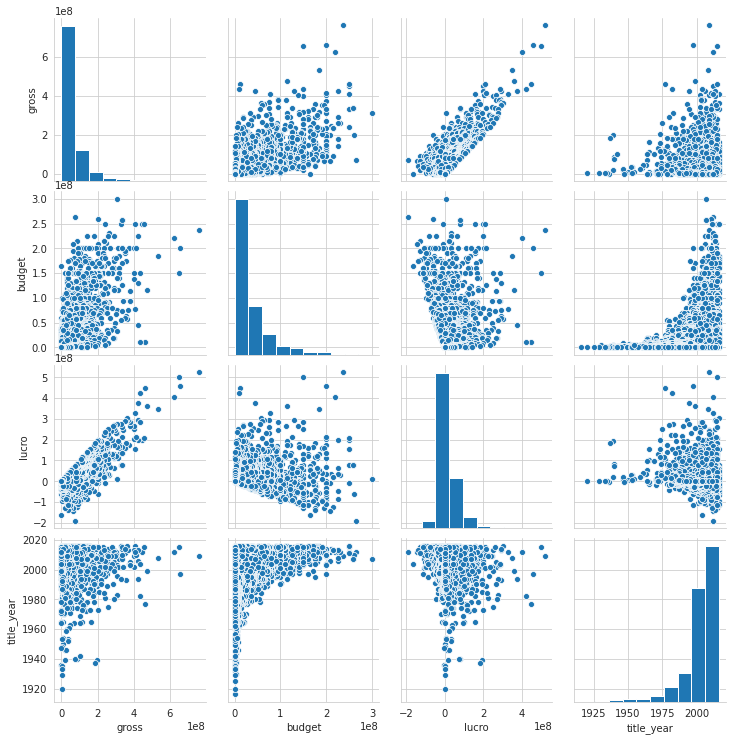

In [147]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])
plt.show()

## Desafio 7 do Thiago Gonçalves
Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.



In [148]:
filmes_depois_de_2000 = imdb_usa.query('title_year >= 2000')
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


Em comparação à correlação anterior vista, para os filmes de depois de 2000 a correlação entre gross-budget e budget-lucro aumentou enquanto entre gross-lucro diminuiu, todos com pequenas margens de diferenças.

Olhando para budget-lucro, foi um aumento pequeno no valor da correlação desses filmes do imdb, mas que condiz com o esperado de que o budget é cada vez maior com o tempo assim como o lucro, os dois crescendo de forma bem semelhante.

## Desafio 8 do Allan Spadini
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)



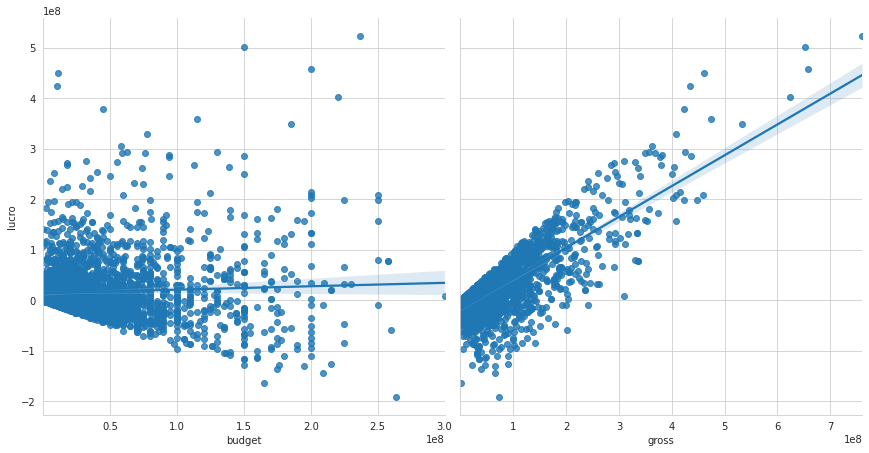

In [149]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')
plt.show()

## Desafio 9 da Thais André
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [150]:
imdb_usa[["gross", "budget", "lucro", "imdb_score"]].corr()

,gross,budget,lucro,imdb_score
gross,1.000000,0.645673,0.797037,0.258948
budget,0.645673,1.000000,0.053455,0.078936
lucro,0.797037,0.053455,1.000000,0.294858
imdb_score,0.258948,0.078936,0.294858,1.000000


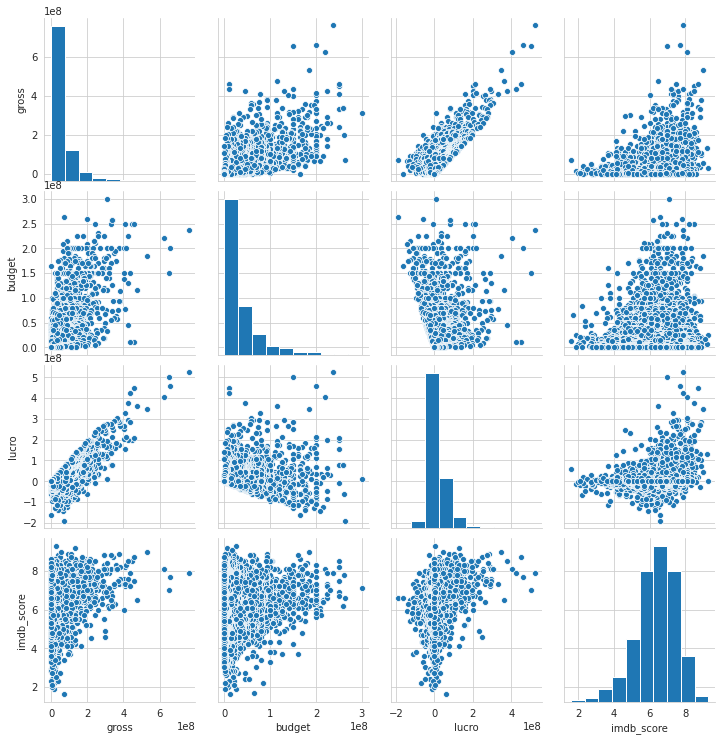

In [151]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "imdb_score"]])
plt.show()